In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, roc_curve, roc_auc_score


In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


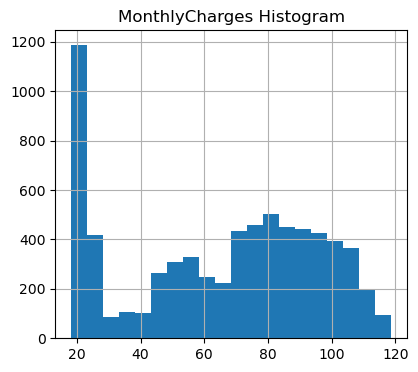

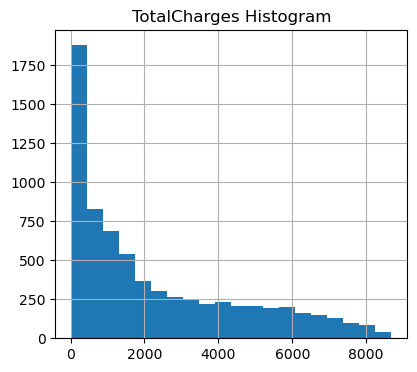

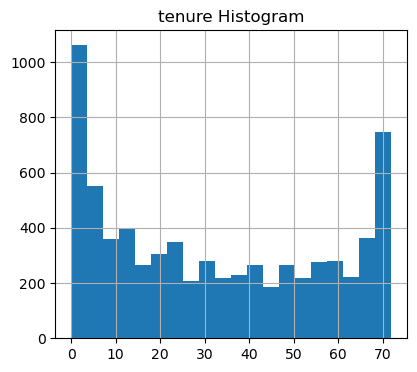

In [9]:
num_fea = ['MonthlyCharges', 'TotalCharges', 'tenure']

for col in num_fea:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=20)
    plt.title(f'{col} Histogram')
    plt.show()



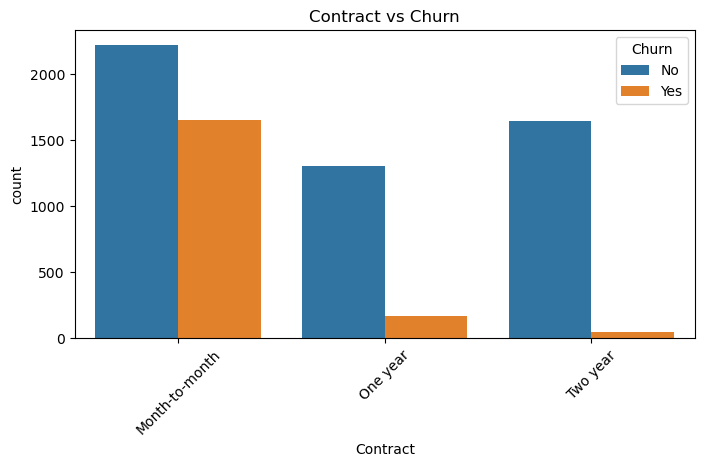

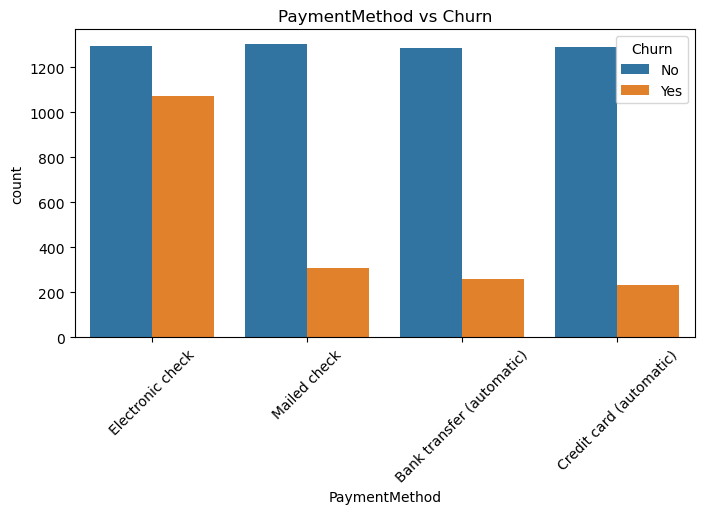

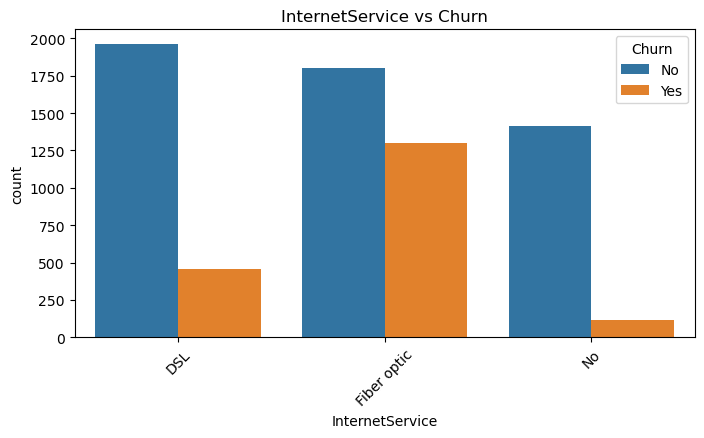

In [10]:
cata_fea = ['Contract', 'PaymentMethod', 'InternetService']

for col in cata_fea:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()


In [11]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

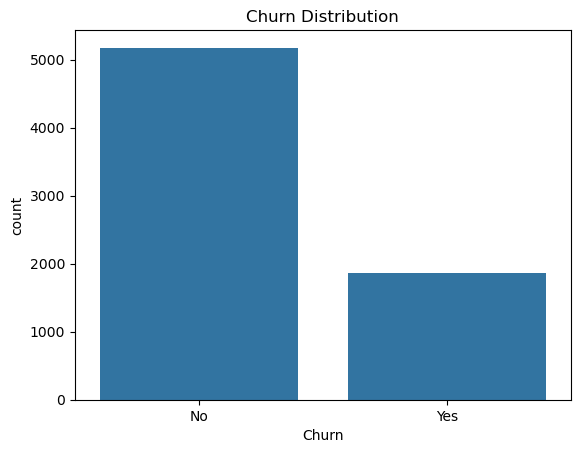

In [12]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [13]:
df = df.drop(['customerID'], axis=1)

In [14]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [15]:
# Encode categorical features .

cata_columns = [ 'gender',  'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

for col in cata_columns:
  lencode = LabelEncoder()
  df[col] = lencode.fit_transform(df[col])

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [17]:
x = df.drop(['Churn'], axis = 1)
y = df['Churn']

In [18]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

# Logistic Regression
## Logistic Regression
A classification algorithm that predicts probabilitie
## Sigmoid Function
Converts any real number into a probability (0–1)
## Based on this probability, the model classifies the input into one of the two categories.

In [19]:
logistic_model = LogisticRegression(max_iter=1400)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=1400)

In [20]:
logi_pred = logistic_model.predict(x_test)
train_ac = logistic_model.score(x_train, y_train)
test_ac = accuracy_score(y_test, logi_pred)
print(f'Train accuracy {train_ac:.4f}')
print(f'Test accuracy {test_ac:.4f}')

Train accuracy 0.7998
Test accuracy 0.8169


In [21]:
logi_clasification = classification_report(y_test, logi_pred)
print(f'LogisticRegression Classification report\n {logi_clasification}')

LogisticRegression Classification report
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



# K-Nearest Neighbors (KNN)
When a new, unlabeled data point needs to be predicted, KNN finds its distance to all training points and selects the K closest neighbors. For classification, it assigns the class that appears most frequently among these neighbors.

In [22]:
# data scale for knn mdoel
scale = StandardScaler()
x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.transform(x_test)

for k in [3, 5, 7, 9]:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train_scale, y_train)
  knn_pred = model.predict(x_test_scale)
  accuracy = accuracy_score(y_test, knn_pred)
  print(f'K {k}  test accuracy {accuracy:.4f}')

K 3  test accuracy 0.7402
K 5  test accuracy 0.7580
K 7  test accuracy 0.7743
K 9  test accuracy 0.7736


In [23]:
# FINAL MODEL
knn_model =KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train_scale, y_train)

KNeighborsClassifier(n_neighbors=7)

In [24]:
k_pred = knn_model.predict(x_test_scale)
train_ac = knn_model.score(x_train_scale, y_train)
test_ac = accuracy_score(y_test, k_pred)
print(f'Train accuracy {train_ac}')
print(f'test accuracy {test_ac}')

Train accuracy 0.8150514731984381
test accuracy 0.7743080198722498


# Compare Results.
The KNN model was trained using different values of K (3, 5, 7, 9), and the test accuracy was compared for each K. The results show that K=7 gives the highest test accuracy (0.775), indicating that this value of K performs best for this dataset

## Impact of Scaling
K-Nearest Neighbors (KNN) predicts based on the distance between points. If features have different ranges, some may dominate the distance calculation. Scaling the data ensures all features contribute equally, which improves model performance.

# Decision Tree

Decision Trees are a type of supervised learning algorithm used for classification and regression. They work by splitting the dataset into subsets based on feature values in a tree-like structure.

The process starts at the root node, which considers all data.

At each node, the algorithm selects the best feature and threshold to split the data, usually based on metrics like Gini impurity, entropy, or variance.

The data is split recursively into child nodes, forming branches.

The process continues until a stopping criterion is met, such as reaching a maximum depth or having pure nodes.

Leaf nodes represent the final predicted class (for classification) or value (for regression).

In [25]:
deci_tree = DecisionTreeClassifier(random_state=42)
deci_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
deci_pred = deci_tree.predict(x_test)
deci_test_accu = accuracy_score(y_test, deci_pred)
train_acu = deci_tree.score(x_train, y_train)

print(f'Decision tree train accuarcy {train_acu:.4f}')
print(f'Decision Tree test accuracy {deci_test_accu:.4f}')

Decision tree train accuarcy 0.9986
Decision Tree test accuracy 0.7253


In [27]:
hyp_deci_tree = DecisionTreeClassifier(max_depth= 5, min_samples_leaf=1, random_state=42)
hyp_deci_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [28]:
d_pred = hyp_deci_tree.predict(x_test)
test_accu = accuracy_score(y_test, d_pred)
train_accu = hyp_deci_tree.score(x_train, y_train)

print(f'Decisiontree with hyperparmeter train accu {train_accu:.4f}')
print(f'Decisiontree with hyperparmeter test accu {test_accu:.4f}')

Decisiontree with hyperparmeter train accu 0.7982
Decisiontree with hyperparmeter test accu 0.7942


# Random Forest Classifier
Random Forest is an ensemble learning method that builds many decision trees instead of relying on just one. Each tree is trained on a random subset of the data and features, and the predictions of all trees are combined. For classification, the forest chooses the class with the most votes, and for regression, it takes the average value.




In [29]:
model = RandomForestClassifier(random_state=42)

In [30]:
param = {
    'n_estimators': [100,200,300,500],
    'max_depth' : [5,7,9,11,15],
    'max_features' : ['sqrt']
}

In [31]:
para_search = GridSearchCV(model, param, cv =5,  scoring='accuracy')
para_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 7, 9, 11, 15],
                         'max_features': ['sqrt'],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy')

In [32]:
print("Best Parameters:", para_search.best_params_)
print("Best CV Accuracy:", para_search.best_score_)

Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300}
Best CV Accuracy: 0.8020937713258135


In [33]:
rf_model = para_search.best_estimator_
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=300, random_state=42)

In [34]:
pred = rf_model.predict(x_test)
test_acc = rf_model.score(x_test, y_test)
train_acc = rf_model.score(x_train, y_train)
rf_clasi_report = classification_report(y_test, pred)

In [35]:
print(f'test accuracy {test_acc}')
print(f'train accuracy {train_acc}')
print(f'Classification Report\n {rf_clasi_report}')

test accuracy 0.8090844570617459
train accuracy 0.8207312744053958
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [36]:
deci_tree_feature_import = deci_tree.feature_importances_
random_forest_feature_import = rf_model.feature_importances_
importance_feature = pd.DataFrame({
    'feature': x.columns,
    'DecisionTree': deci_tree_feature_import,
    'Randomforest': random_forest_feature_import
}).sort_values('Randomforest', ascending=False)

In [37]:
importance_feature

,feature,DecisionTree,Randomforest
14,Contract,0.166295,0.189717
4,tenure,0.111674,0.173909
18,TotalCharges,0.200148,0.119329
8,OnlineSecurity,0.044898,0.107078
17,MonthlyCharges,0.215873,0.102973
11,TechSupport,0.013651,0.075211
7,InternetService,0.026732,0.056228
9,OnlineBackup,0.019248,0.035197
16,PaymentMethod,0.046128,0.032776
10,DeviceProtection,0.013467,0.020482


# Model Evaluation

In [38]:
model = {
    'LogisticRegresion': logistic_model,
    'KNN' : knn_model,
    'DecisionTree': hyp_deci_tree,
    'RandomForest':rf_model
}

result = {}

for name , model_name in model.items():
  if name == 'KNN':
    x_test_model = x_test_scale
  else:
    x_test_model = x_test

  y_pred = model_name.predict(x_test_model)
  confusion_met = confusion_matrix(y_test,y_pred)
  TN,FP,FN,TP = confusion_met.ravel()

  print(f'Confusion matrix {name}')
  print(confusion_met)
  print(classification_report(y_test, y_pred))
  result[name] = (model_name, y_pred)

Confusion matrix LogisticRegresion
[[934 102]
 [156 217]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Confusion matrix KNN
[[892 144]
 [174 199]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1036
           1       0.58      0.53      0.56       373

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409

Confusion matrix DecisionTree
[[881 155]
 [135 238]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1036
           1       0.61      0.64      0.62       373

    accuracy               

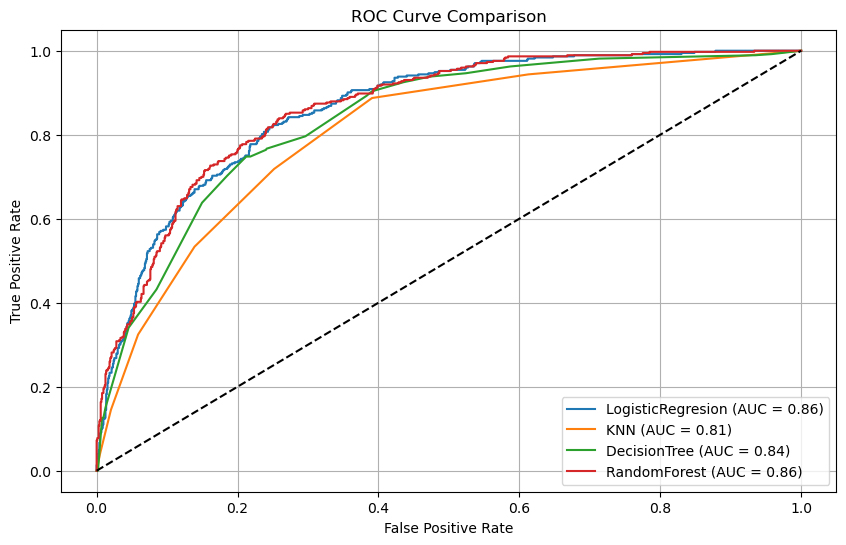

In [39]:
# ROC curve

plt.figure(figsize=(10, 6))
for name, (model,_) in result.items():
  if name == 'KNN':
    x_test_model = x_test_scale
  else:
    x_test_model = x_test
  y_prob = model.predict_proba(x_test_model)[:,1]
  roc_auc = roc_auc_score(y_test, y_prob)
  fpr,tpr,_ = roc_curve(y_test, y_prob)
  plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

# performance summary



In [40]:
summary = []

for name, (model, _ ) in result.items():
  if name == 'KNN':
    x_train_model = x_train_scale
    x_test_model = x_test_scale
  else:
    x_train_model = x_train
    x_test_model = x_test

  y_pred = model.predict(x_test_model)
  y_prob = model.predict_proba(x_test_model)[:,1]
    
  summary.append({
        "Model": name,
        "Train Accuracy": model.score(x_train_model, y_train),
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    })
performance_df = pd.DataFrame(summary).set_index("Model").sort_values("Test Accuracy", ascending=False)
performance_df


,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,,
LogisticRegresion,0.799787,0.816891,0.680251,0.581769,0.627168,0.861515
RandomForest,0.820731,0.809084,0.691176,0.504021,0.582946,0.863669
DecisionTree,0.798190,0.794180,0.605598,0.638070,0.621410,0.837285
KNN,0.815051,0.774308,0.580175,0.533512,0.555866,0.806682


# Discuss
* Random Forest performs best overall, balancing accuracy and discriminative power
* Recall is the most important metric for this business problem, because the company wants to detect as many potential churners as possible
* There is a trade-off between model interpretability and performance. Random Forest is highly accurate but hard to explain, Logistic Regression is easy to interpret but may miss complex patterns, Decision Tree balances performance and interpretability, and KNN has moderate performance but is difficult to explain. The choice depends on business goals.



# Insights and Conclusion
 ## Key factors that influence customer churn
* **Monthly Charges**: Customers paying higher monthly bills are more likely to churn.  
* **Total Charges**: Those with inconsistent or higher total payments tend to leave more often.  
* **Tenure**: Customers who have been with the company for a shorter period are more likely to churn.  
* **Contract Type**: Month-to-month contract holders show higher churn compared to customers with one- or two-year contracts.  
* **Subscribed Services**: Customers without add-on services like Online Security, Tech Support, or Streaming Services have a higher chance of leaving.  
##  Recommended Model for Deployment
 **Random Forest** is the best choice for deployment.  
  It delivers **high accuracy and strong ROC-AUC**, making its predictions reliable. It reduces the risk of overfitting compared to a single tree. 
## Business implications of false positives and false negatives.
*  **False Positives** (predicting churn when the customer actually stays)
*  **False Negatives** (failing to predict churn when the customer actually leaves)
*  For churn prediction, minimizing false negatives

## **Limitations:**  
- The dataset is static, which means it only shows customer information at one point in time. It does not include future behavior or changes.  
- Some features have missing or inconsistent values (like Total Charges).  
- Models like Random Forest and KNN are hard to explain for each individual prediction.  
- The model may not work perfectly for new customers or if customer behavior changes.

## **Potential Improvements:**  
- Collect more detailed data, like how customers use services or contact support.  y.  
- Retrain the model regularly to keep it updated with new customer behavior.  
- Use feature selection or reduce the number of features to make the model simpler without losing performance.

  